# Machine Learning Wrap-Up Demonstration

In [1]:
#data imports
import pandas as pd
import numpy as np

#custom imports
import prepare

#visual imports
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

#K-Fold cross-validation imports
from sklearn.model_selection import KFold, cross_val_score

#gridsearch imports
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
#from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## Acquire

In [2]:
df = pd.read_csv('customer_segmentation.csv')

In [3]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1291,5068,1971,Graduation,Single,22804.0,1,0,31-07-2013,75,14,...,9,0,0,0,0,0,0,3,11,0
280,4669,1981,Basic,Married,24480.0,1,0,11-02-2013,46,4,...,7,0,0,0,0,0,0,3,11,0
1588,5892,1980,Graduation,Married,34968.0,1,0,10-04-2013,11,158,...,7,0,0,0,0,0,0,3,11,0
470,2021,1975,Graduation,Married,61456.0,0,1,27-03-2013,47,563,...,4,0,0,0,0,0,0,3,11,0
1033,5263,1977,2n Cycle,Married,31056.0,1,0,22-01-2013,99,5,...,8,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Prepare

#### Correct Column Names

In [5]:
df.columns = df.columns.str.lower()

#### Drop ID Column

In [6]:
df = df.drop('id', axis=1)

#### Value Counts

In [7]:
for col in df.columns:
    print(f"Value counts for {col}:\n")
    print(df[col].value_counts())
    print('--------')

Value counts for year_birth:

1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: year_birth, dtype: int64
--------
Value counts for education:

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: education, dtype: int64
--------
Value counts for marital_status:

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alon

### Correct Data in Marital Status

In [8]:
#clean up marital status
df['marital_status'] = df['marital_status'].replace(['Alone', 'YOLO', 'Absurd'], 'Single')
df['marital_status'] = df['marital_status'].replace(['Together'], 'Married')

#### Make a copy of our dataframe before dummies created and outliers dropped

In [9]:
#save the previous dataframe (prior to )
df_old = df.copy()

#### Look at outliers

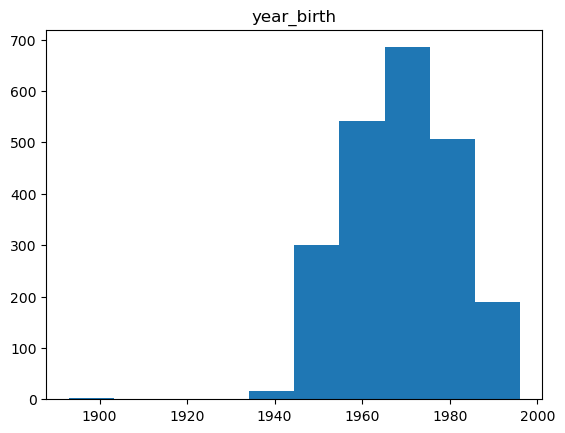

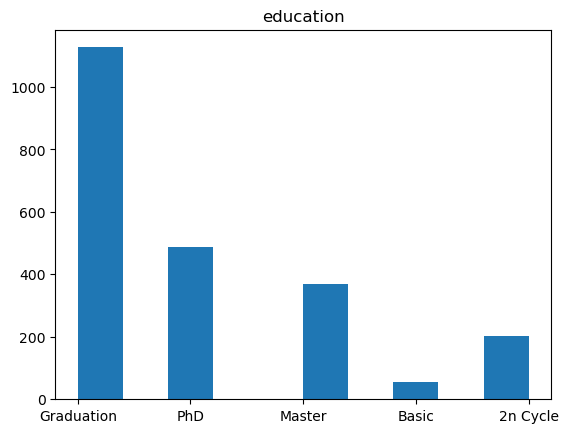

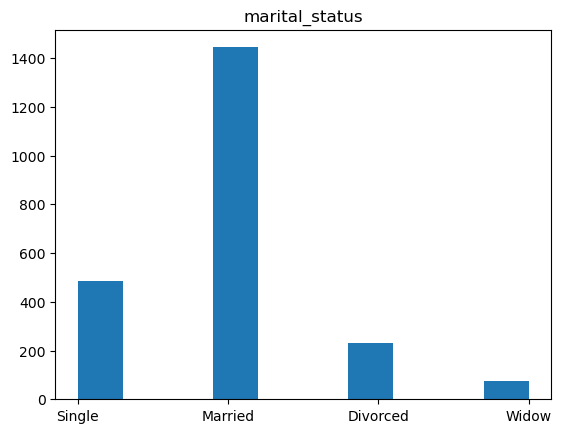

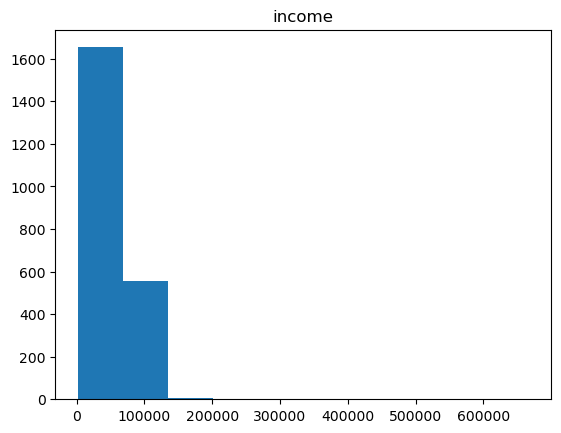

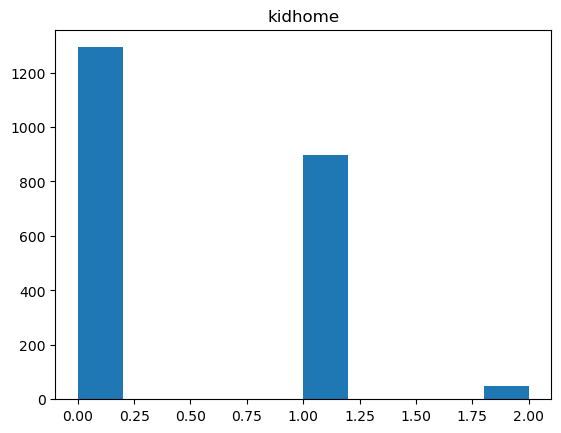

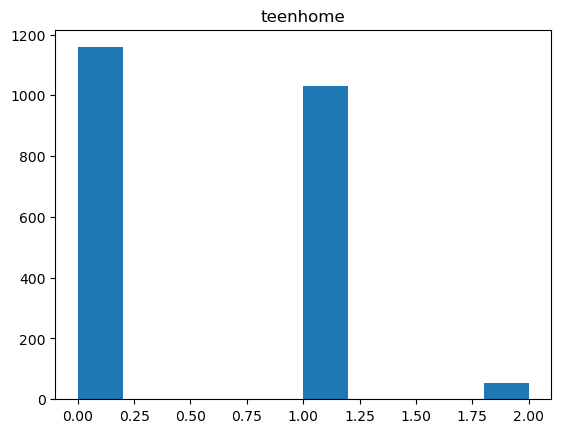

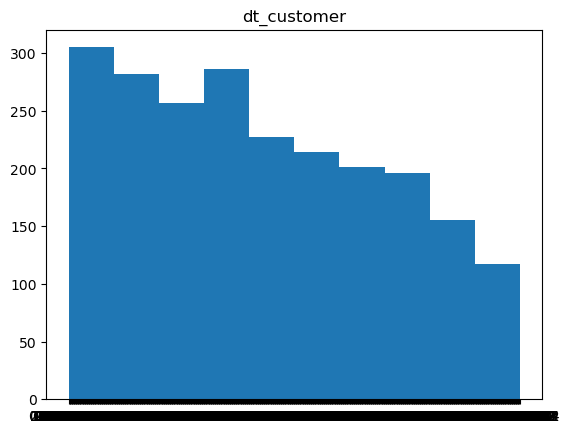

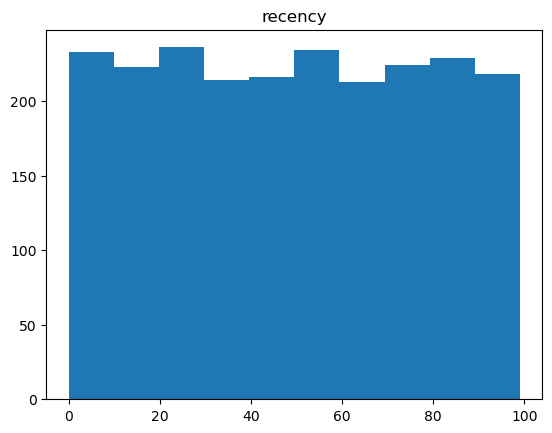

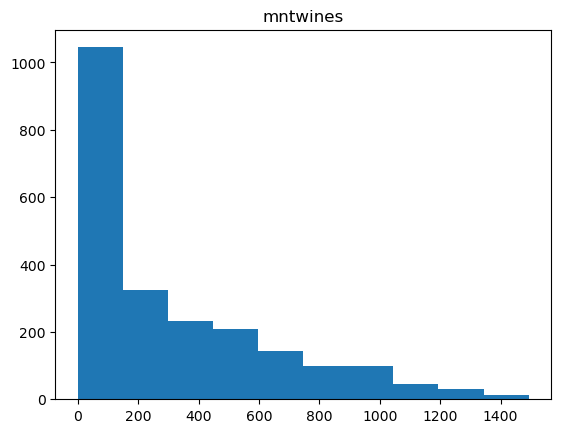

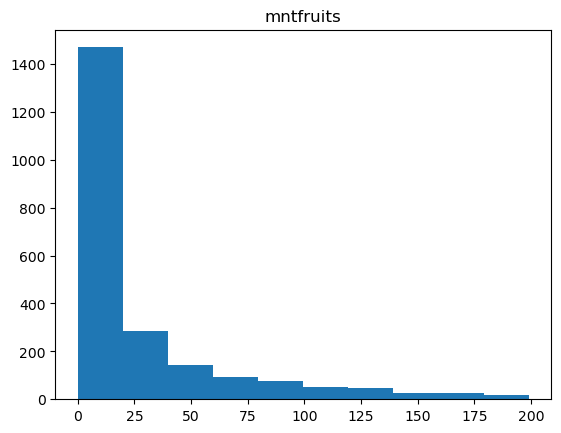

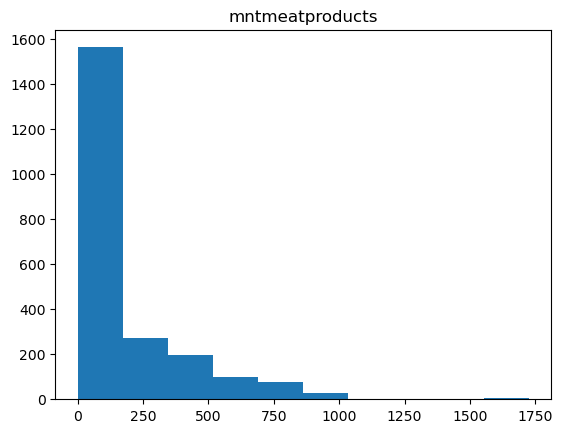

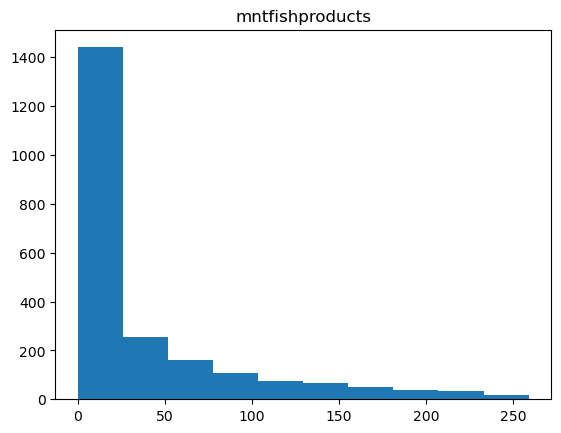

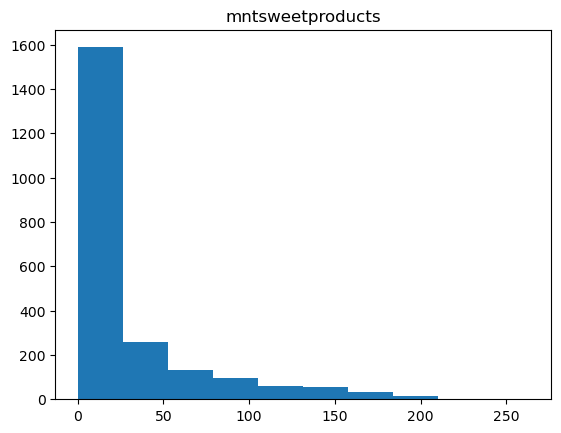

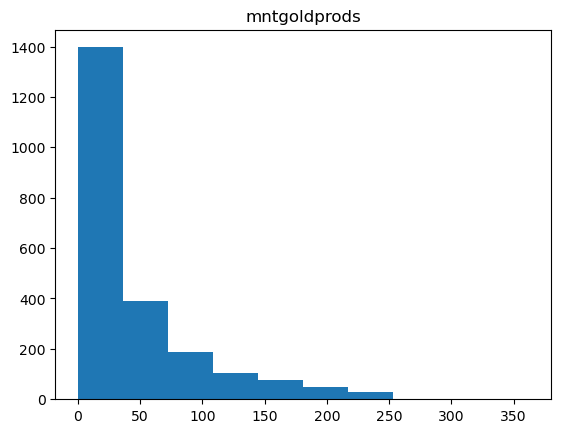

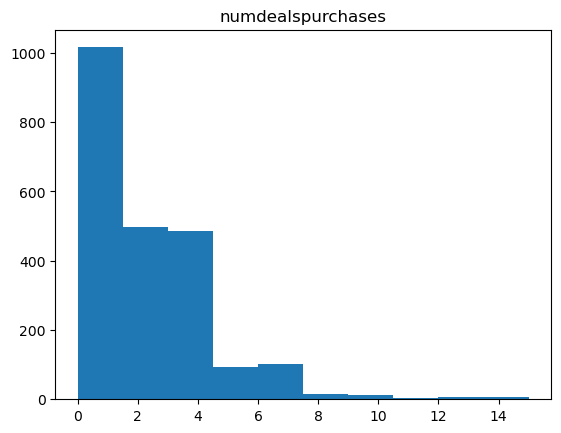

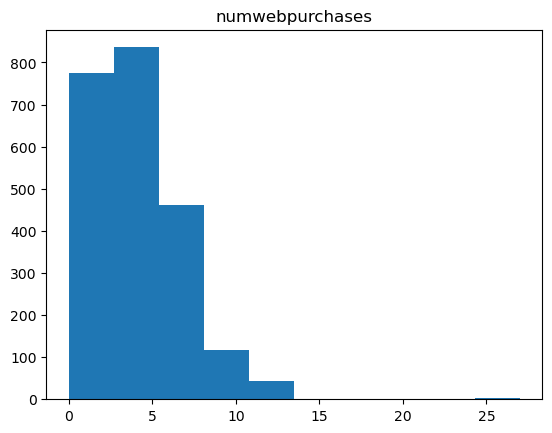

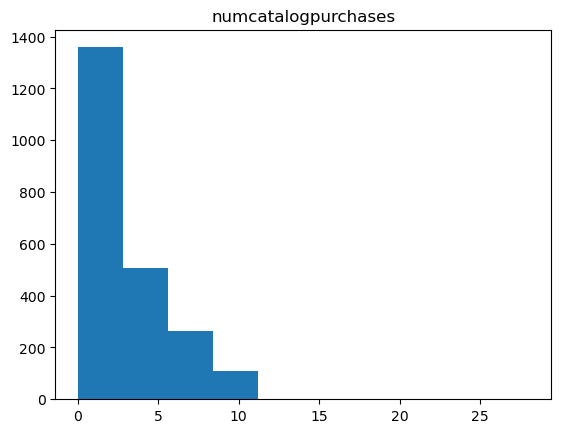

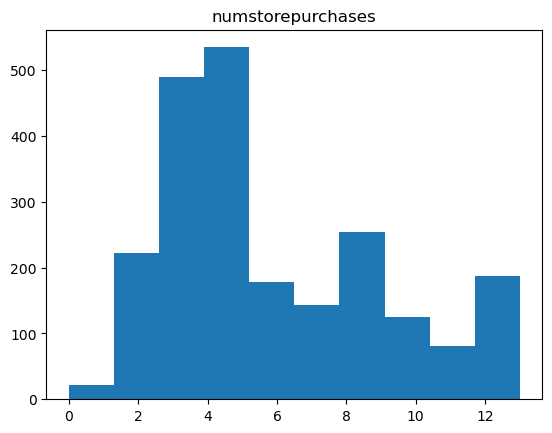

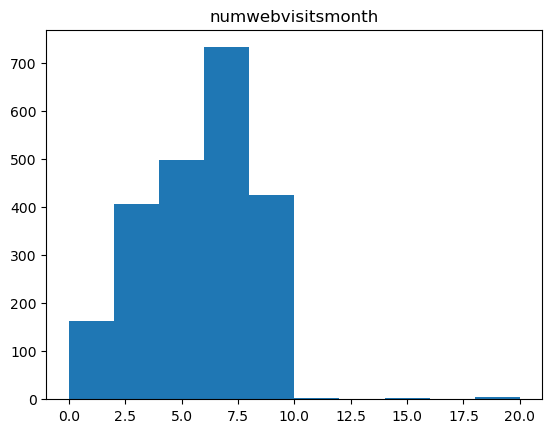

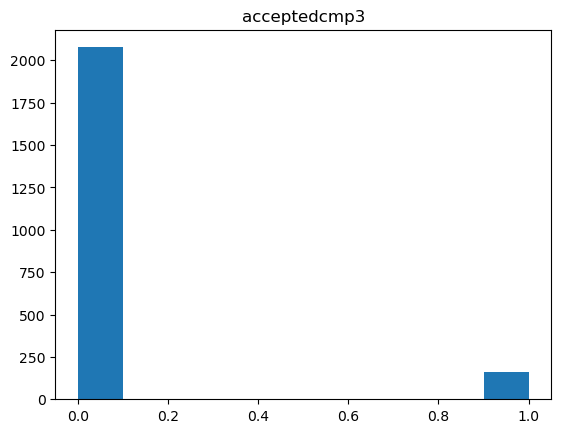

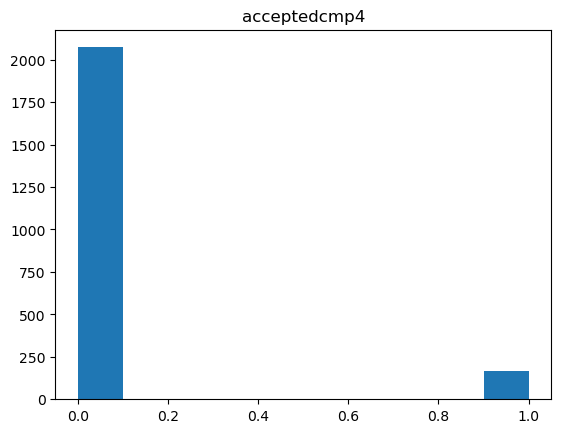

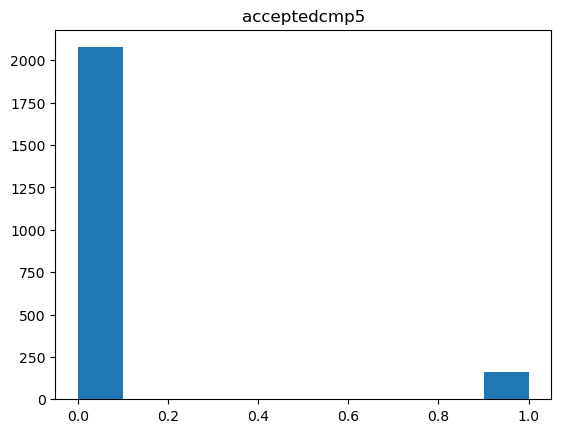

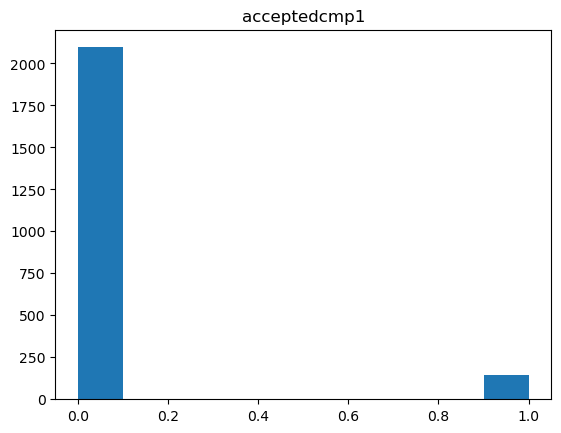

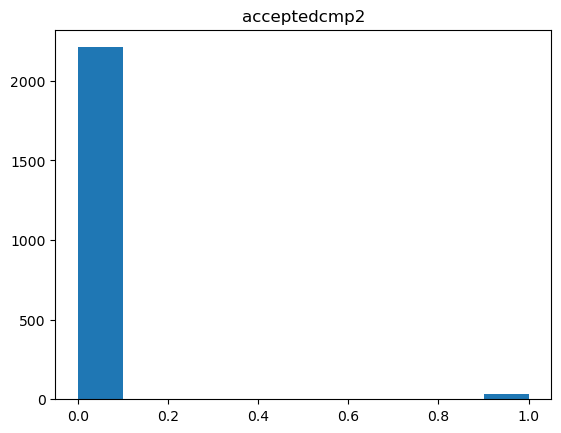

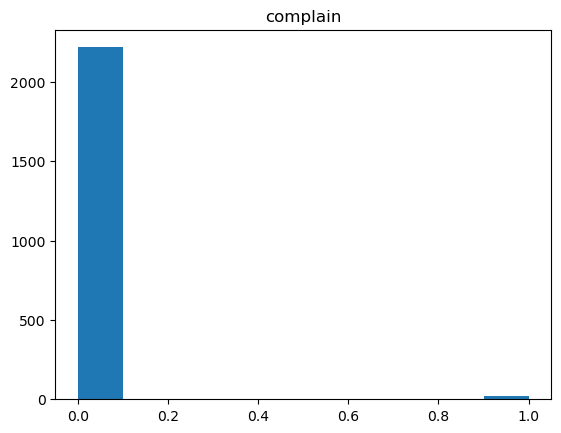

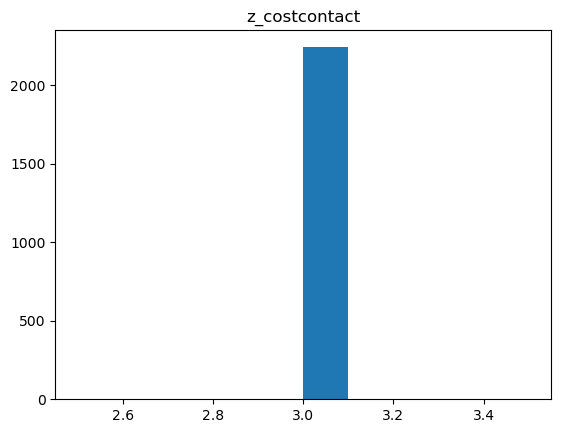

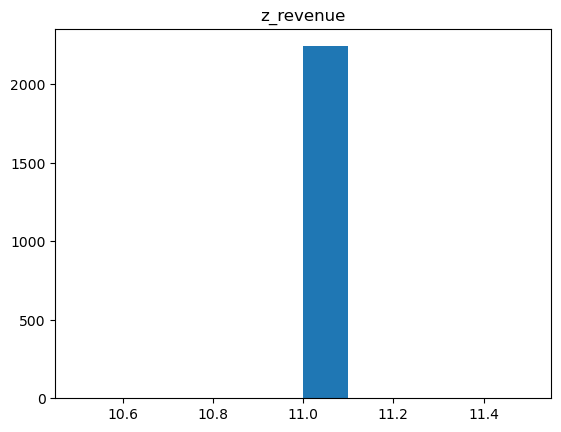

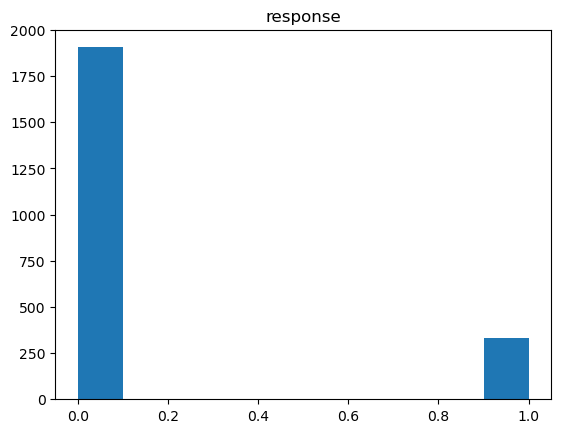

In [10]:
#visualize distributions 
#check for outliers
#visualize distribution
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [11]:
############################## IDENTIFIES OUTLIERS FUNCTION ##############################

# function to determine outliers
def outlier_bound_calculation(df, variable):
    quartile1, quartile3 = np.percentile(df[variable], [25, 75])
    IQR_value = quartile3 - quartile1
    lower_bound = quartile1 - (3 * IQR_value)
    upper_bound = quartile3 + (3 * IQR_value)
    print(f'For {variable}, the lower bound is {lower_bound} and upper bound is {upper_bound}')


In [12]:
# Specify the columns you want to apply the function to
cols = ['income', 'mntwines', 'mntmeatproducts','mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases','numwebvisitsmonth']

# Applying the function to each column in the specified list
for col in cols:
    if col in df.columns: 
        outlier_bound_calculation(df, col)

For income, the lower bound is nan and upper bound is nan
For mntwines, the lower bound is -1417.75 and upper bound is 1945.75
For mntmeatproducts, the lower bound is -632.0 and upper bound is 880.0
For mntfishproducts, the lower bound is -138.0 and upper bound is 191.0
For mntsweetproducts, the lower bound is -95.0 and upper bound is 129.0
For mntgoldprods, the lower bound is -132.0 and upper bound is 197.0
For numdealspurchases, the lower bound is -5.0 and upper bound is 9.0
For numwebpurchases, the lower bound is -10.0 and upper bound is 18.0
For numcatalogpurchases, the lower bound is -12.0 and upper bound is 16.0
For numstorepurchases, the lower bound is -12.0 and upper bound is 23.0
For numwebvisitsmonth, the lower bound is -9.0 and upper bound is 19.0


In [13]:
############################## REMOVE OUTLIERS  ##############################
# Function to remove outliers
def remove_outliers(df, k, col_list):
    ''' 
    Remove outliers from a list of columns in a dataframe 
    and return the cleaned dataframe along with the number of observations dropped.
    '''
    
    initial_count = df.shape[0]  # Get the initial number of rows
    
    for col in col_list:
        if col in df.columns:  # Ensure column exists
            q1, q3 = df[col].quantile([.25, .75])  # Get quartiles
            iqr = q3 - q1  # Calculate interquartile range
            
            upper_bound = q3 + k * iqr   # Get upper bound
            lower_bound = q1 - k * iqr   # Get lower bound

            # Apply outlier filter to each column without affecting the entire DataFrame
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    final_count = df.shape[0]  # Get the final number of rows after removing outliers
    
    observations_dropped = initial_count - final_count  # Calculate how many rows were dropped
    
    # Ensure the print statement works
    print(f'Number of observations dropped: {observations_dropped}')
    
    return df

In [14]:
# Apply remove_outliers function to all numeric columns
df = remove_outliers(df, 3, cols)

Number of observations dropped: 322


#### Change datatypes

In [15]:
df['dt_customer'] = pd.to_datetime(df['dt_customer'], format='%d-%m-%Y')

#### Feature Engineering

In [16]:
df['enroll_month'] = df['dt_customer'].dt.month
df['enroll_month_name'] = df['dt_customer'].dt.strftime('%B')
df['enroll_weekday'] = df['dt_customer'].dt.strftime('%A')
df['enroll_day'] = df['dt_customer'].dt.day
df['enroll_year'] = df['dt_customer'].dt.year

#### Drop Columns

In [17]:
df = df.drop('dt_customer', axis=1)

#### Create Dummy Variables

In [18]:
dummy_df = pd.get_dummies(df[['education','marital_status', 'enroll_month_name', 'enroll_weekday', 'enroll_year']], drop_first=True)

In [19]:
df = pd.concat([df, dummy_df], axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1918 entries, 0 to 2239
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year_birth                   1918 non-null   int64  
 1   education                    1918 non-null   object 
 2   marital_status               1918 non-null   object 
 3   income                       1918 non-null   float64
 4   kidhome                      1918 non-null   int64  
 5   teenhome                     1918 non-null   int64  
 6   recency                      1918 non-null   int64  
 7   mntwines                     1918 non-null   int64  
 8   mntfruits                    1918 non-null   int64  
 9   mntmeatproducts              1918 non-null   int64  
 10  mntfishproducts              1918 non-null   int64  
 11  mntsweetproducts             1918 non-null   int64  
 12  mntgoldprods                 1918 non-null   int64  
 13  numdealspurchases 

#### Look at null values

In [21]:
# Filtering and displaying columns with more than 0 null values
print(df.isnull().sum()[df.isnull().sum() > 0])

Series([], dtype: int64)


In [22]:
#impute continuous columns using mean
df['income'] = df['income'].fillna(df['income'].mean())

<b>Null values imputed with average</b>

## Explore

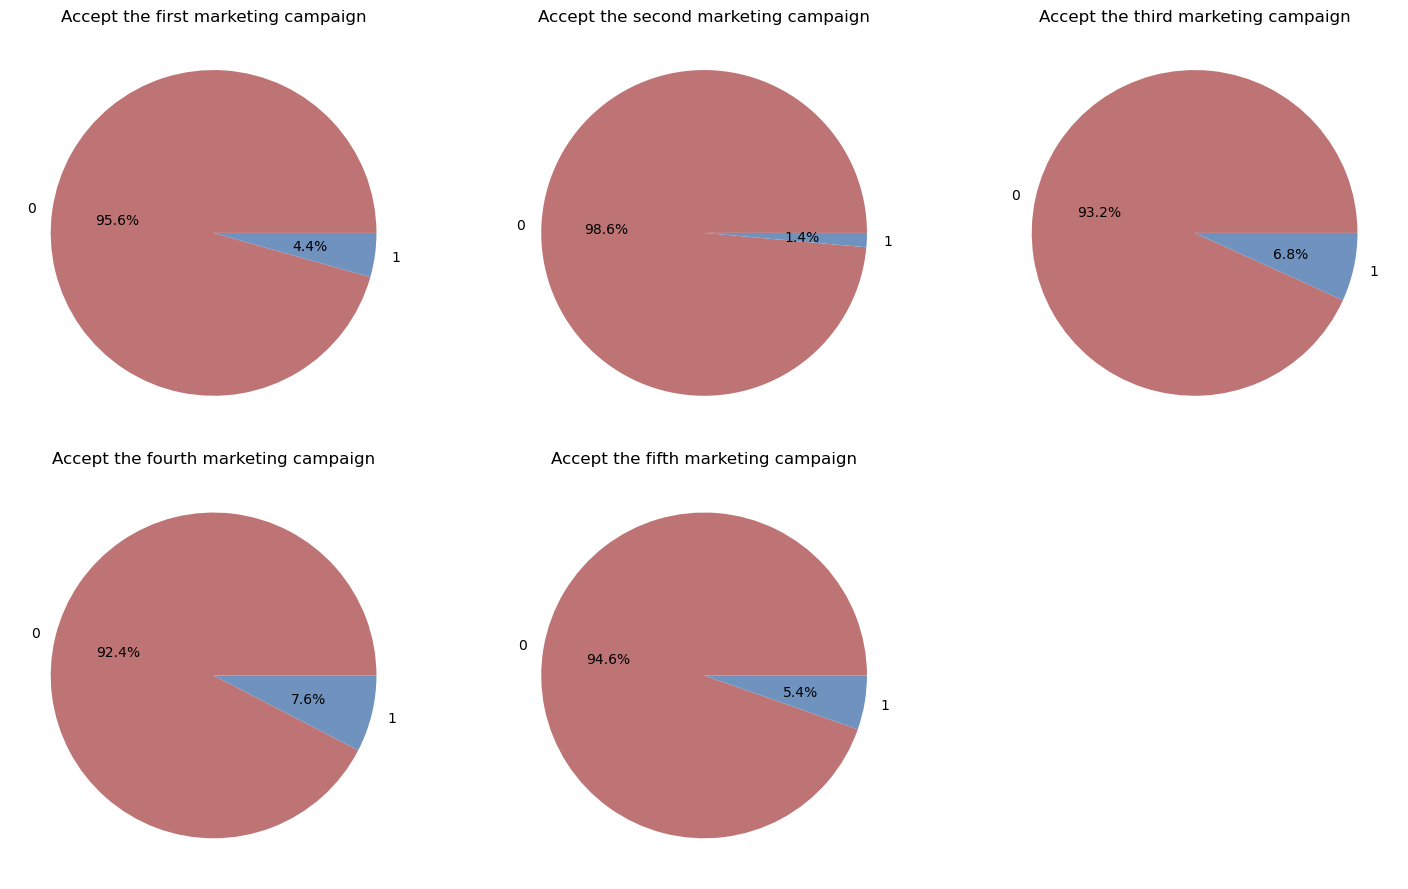

In [23]:
import matplotlib.pyplot as plt

# Assuming mp1 to mp5 are already defined as value counts from your DataFrame
mp1 = df['acceptedcmp1'].value_counts()
mp2 = df['acceptedcmp2'].value_counts()
mp3 = df['acceptedcmp3'].value_counts()
mp4 = df['acceptedcmp4'].value_counts()
mp5 = df['acceptedcmp5'].value_counts()

# Define colors
max_color = '#BE7475'
min_color = '#7092BE'
colors = [max_color, min_color]

# Create subplots for pie charts
plt.figure(figsize=(15,9))

# Pie chart for 'acceptedcmp1'
plt.subplot(2, 3, 1)
plt.pie(mp1, labels=mp1.index, autopct='%1.1f%%', colors=colors)
plt.title('Accept the first marketing campaign')

# Pie chart for 'acceptedcmp2'
plt.subplot(2, 3, 2)
plt.pie(mp2, labels=mp2.index, autopct='%1.1f%%', colors=colors)
plt.title('Accept the second marketing campaign')

# Pie chart for 'acceptedcmp3'
plt.subplot(2, 3, 3)
plt.pie(mp3, labels=mp3.index, autopct='%1.1f%%', colors=colors)
plt.title('Accept the third marketing campaign')

# Pie chart for 'acceptedcmp4'
plt.subplot(2, 3, 4)
plt.pie(mp4, labels=mp4.index, autopct='%1.1f%%', colors=colors)
plt.title('Accept the fourth marketing campaign')

# Pie chart for 'acceptedcmp5'
plt.subplot(2, 3, 5)
plt.pie(mp5, labels=mp5.index, autopct='%1.1f%%', colors=colors)
plt.title('Accept the fifth marketing campaign')

# Display all the pie charts
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Income of Customers')

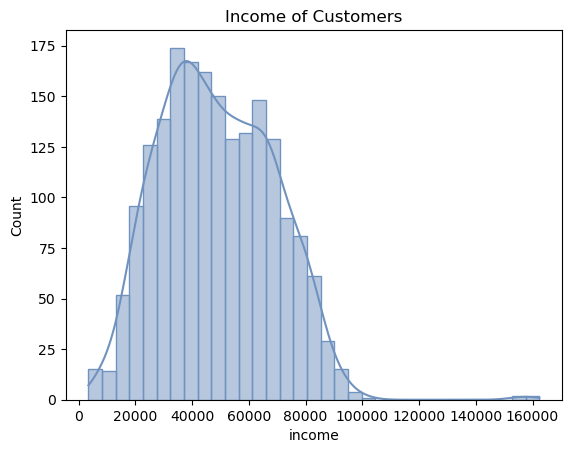

In [24]:
x = df['income']

col = '#7092BE'
sns.histplot(x, kde=True, color=col, edgecolor=col)
plt.title('Income of Customers')

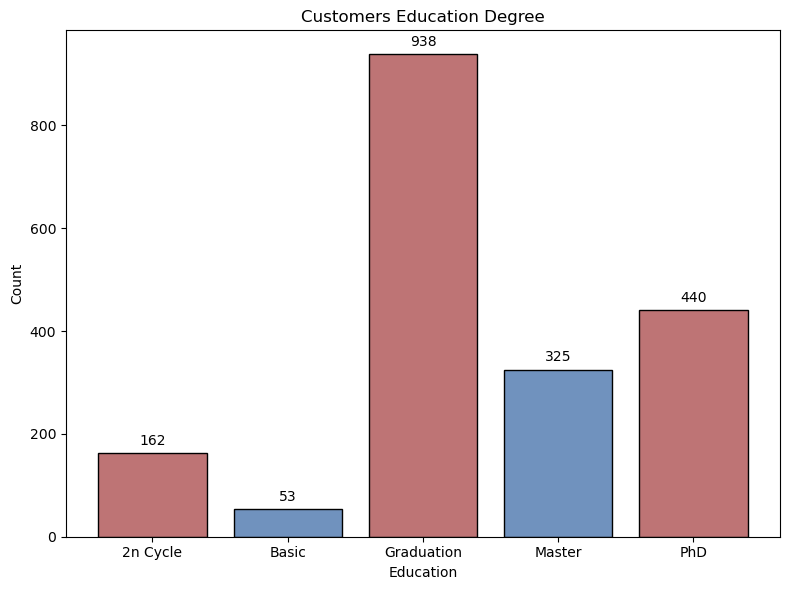

In [25]:
import matplotlib.pyplot as plt

# Plot for 'Education'
x = df['education'].value_counts()
x = x.sort_index()

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(x.index, x.values, color=['#BE7475' if i % 2 == 0 else '#7092BE' for i in range(len(x))], edgecolor='black')
plt.title('Customers Education Degree')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add values on top of bars
for i, value in enumerate(x.values):
    plt.text(i, value + 10, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


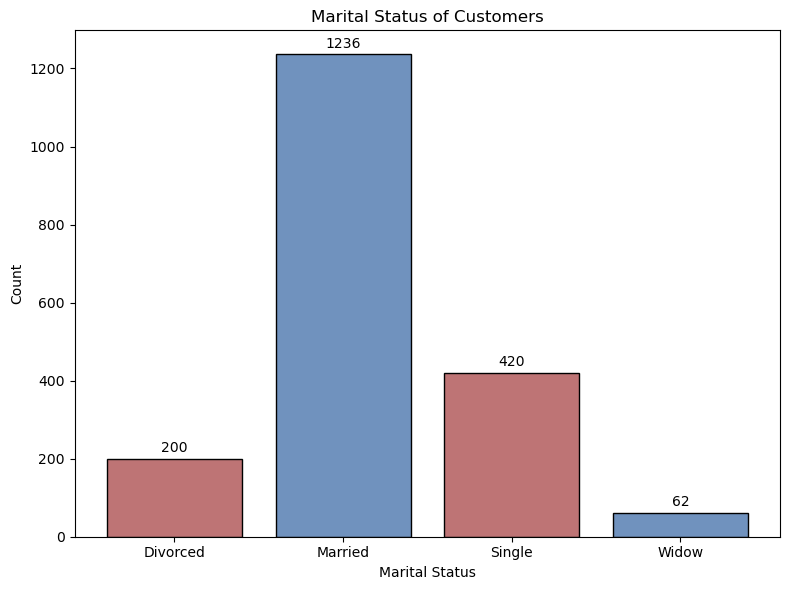

In [26]:

# Plot for 'Marital_Status'
x = df['marital_status'].value_counts()
x = x.sort_index()

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(x.index, x.values, color=['#BE7475' if i % 2 == 0 else '#7092BE' for i in range(len(x))], edgecolor='black')
plt.title('Marital Status of Customers')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add values on top of bars
for i, value in enumerate(x.values):
    plt.text(i, value + 10, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

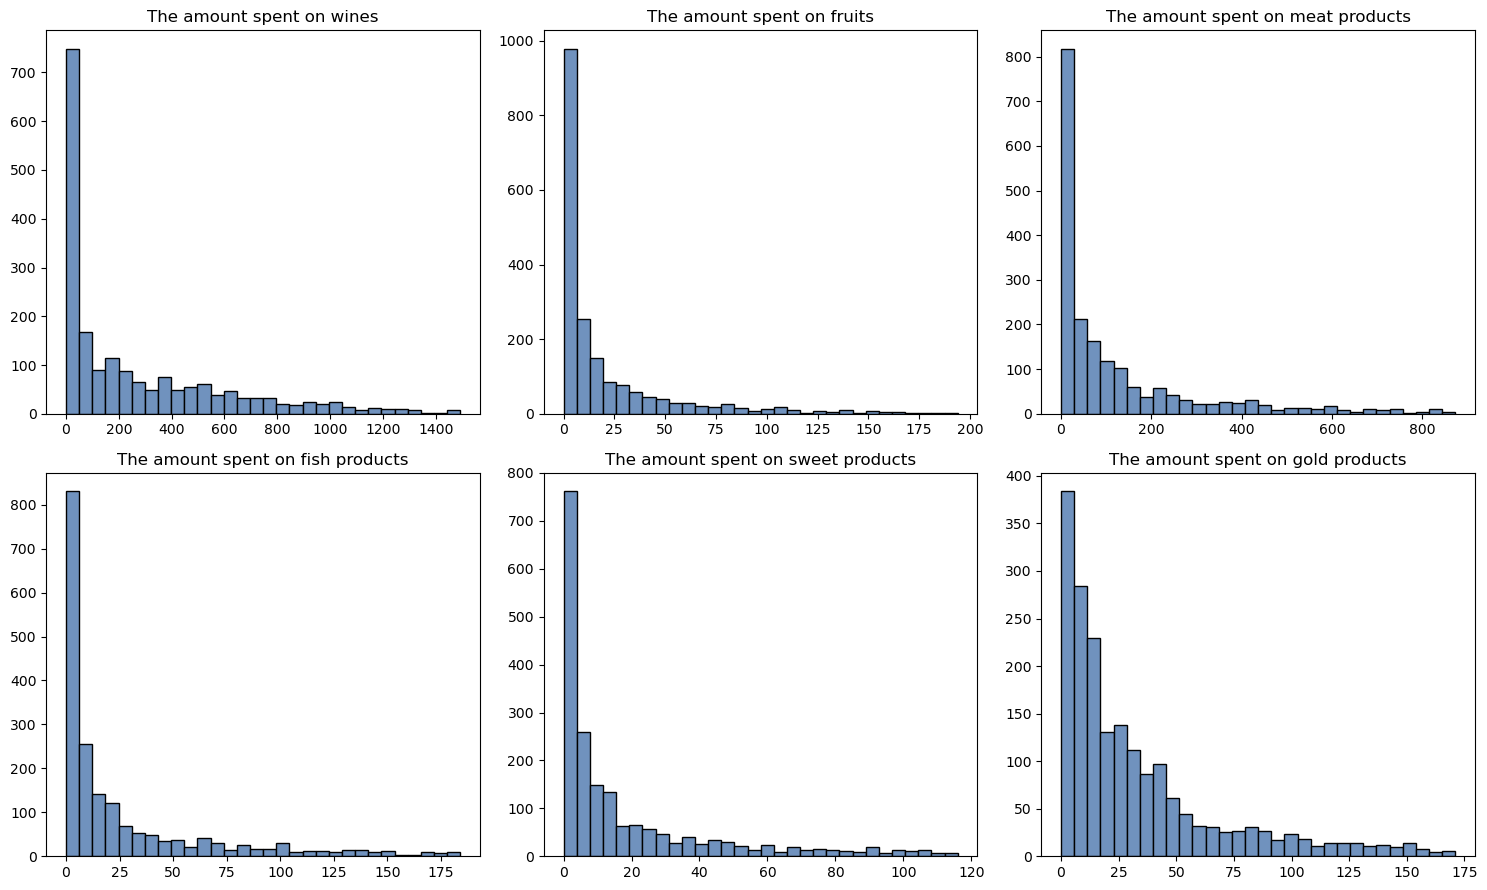

In [27]:
import matplotlib.pyplot as plt

# Defining columns
wine = df['mntwines']
fruit = df['mntfruits']
meat = df['mntmeatproducts']
fish = df['mntfishproducts']
sweet = df['mntsweetproducts']
gold = df['mntgoldprods']

# Creating the figure and subplots
plt.figure(figsize=(15,9))
col = '#7092BE'

# Subplot 1: Histogram for wine
plt.subplot(2, 3, 1)
plt.hist(wine, bins=30, color=col, edgecolor='black')
plt.title('The amount spent on wines')

# Subplot 2: Histogram for fruits
plt.subplot(2, 3, 2)
plt.hist(fruit, bins=30, color=col, edgecolor='black')
plt.title('The amount spent on fruits')

# Subplot 3: Histogram for meat products
plt.subplot(2, 3, 3)
plt.hist(meat, bins=30, color=col, edgecolor='black')
plt.title('The amount spent on meat products')

# Subplot 4: Histogram for fish products
plt.subplot(2, 3, 4)
plt.hist(fish, bins=30, color=col, edgecolor='black')
plt.title('The amount spent on fish products')

# Subplot 5: Histogram for sweet products
plt.subplot(2, 3, 5)
plt.hist(sweet, bins=30, color=col, edgecolor='black')
plt.title('The amount spent on sweet products')

# Subplot 6: Histogram for gold products
plt.subplot(2, 3, 6)
plt.hist(gold, bins=30, color=col, edgecolor='black')
plt.title('The amount spent on gold products')

# Display all histograms
plt.tight_layout()
plt.show()

In [28]:
#combine purchases to create clusters
df['purchases'] = df['mntwines'] + df['mntfruits'] + df['mntmeatproducts'] + df['mntfishproducts'] + df['mntsweetproducts'] + df['mntgoldprods']

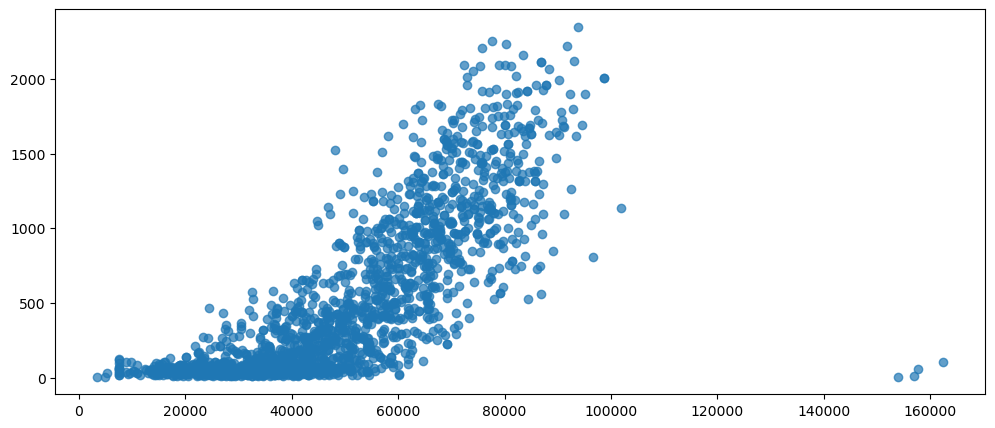

In [29]:
plt.figure(figsize=(12, 5))

plt.scatter(df['income'], df['purchases'], alpha=0.7)
plt.show()

In [30]:
df.columns = df.columns.str.lower()

## Clustering

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1918 entries, 0 to 2239
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year_birth                   1918 non-null   int64  
 1   education                    1918 non-null   object 
 2   marital_status               1918 non-null   object 
 3   income                       1918 non-null   float64
 4   kidhome                      1918 non-null   int64  
 5   teenhome                     1918 non-null   int64  
 6   recency                      1918 non-null   int64  
 7   mntwines                     1918 non-null   int64  
 8   mntfruits                    1918 non-null   int64  
 9   mntmeatproducts              1918 non-null   int64  
 10  mntfishproducts              1918 non-null   int64  
 11  mntsweetproducts             1918 non-null   int64  
 12  mntgoldprods                 1918 non-null   int64  
 13  numdealspurchases 

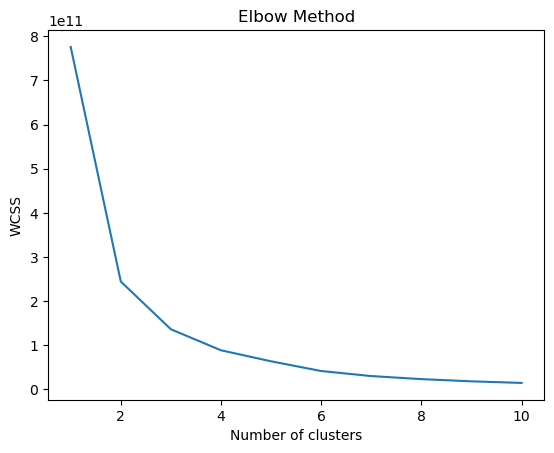

In [32]:
# Select numeric and categorical columns
numeric_columns = df.select_dtypes(include=[float, int]).columns
categorical_columns = df.select_dtypes(include=[object]).columns

# Apply OneHotEncoding to categorical columns
ct = ColumnTransformer([('encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')

# Transform the DataFrame
df_transformed = ct.fit_transform(df)

# Now apply K-Means to the transformed DataFrame
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=3000, random_state=42)
    kmeans.fit(df_transformed)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to find the optimal number of clusters (Elbow Method)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

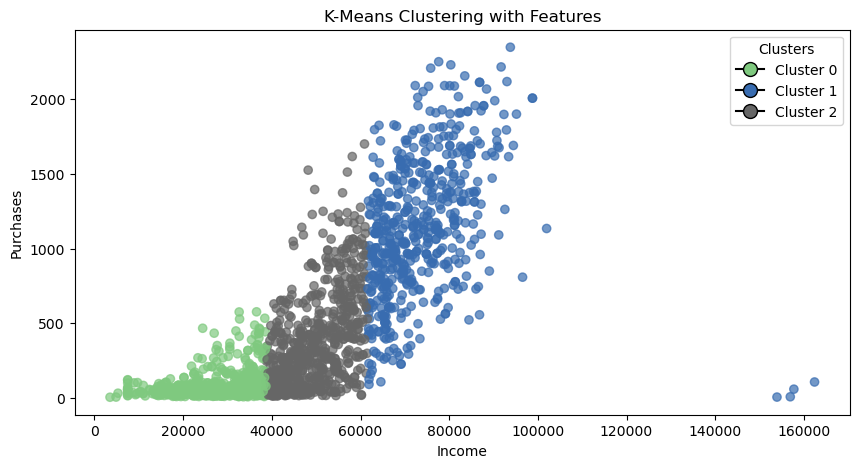

In [33]:
from sklearn.cluster import KMeans

# K-Means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(df[['income', 'purchases']])

# Add the cluster labels as a new column in the DataFrame
df['cluster'] = kmeans_labels

# Optionally, visualize the clustering again
plt.figure(figsize=(10, 5))
scatter = plt.scatter(df['income'], df['purchases'], c=df['cluster'], cmap='Accent', alpha=0.7)

legend_elements = [plt.Line2D([0], [0], marker='o', color='black', label=f'Cluster {i}', 
                           markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) 
                   for i in range(3)]
plt.legend(handles=legend_elements, title='Clusters')

plt.title('K-Means Clustering with Features')
plt.xlabel('Income')
plt.ylabel('Purchases')
plt.show()

In [34]:
df.head()

,year_birth,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,...,enroll_month_name_october,enroll_month_name_september,enroll_weekday_monday,enroll_weekday_saturday,enroll_weekday_sunday,enroll_weekday_thursday,enroll_weekday_tuesday,enroll_weekday_wednesday,purchases,cluster
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,1,0,0,0,0,1,0,1617,2
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,1,0,0,0,0,27,2
2,1965,Graduation,Married,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,0,1,776,1
3,1984,Graduation,Married,26646.0,1,0,26,11,4,20,...,0,0,1,0,0,0,0,0,53,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,1,0,0,0,422,2


### Split Data

In [35]:
def simple_split(df):
    '''
    This function take in get_zillow  from aquire.py and performs a train, validate, test split
    Returns train, validate, test and prints out the shape of train, validate, test
    '''
    #create train_validate and test datasets
    train, test = train_test_split(df, train_size = 0.8, random_state = 123)
    #create train and validate datasets
    train, validate = train_test_split(train, train_size = 0.7, random_state = 123)

    # Have function print datasets shape
    print(f'train -> {train.shape}')
    print(f'validate -> {validate.shape}')
    print(f'test -> {test.shape}')
   
    return train, validate, test

In [36]:
train, validate, test = simple_split(df)

train -> (1073, 59)
validate -> (461, 59)
test -> (384, 59)


In [37]:
def tvt_split(df, target):
    '''
    This function take in get_zillow  from aquire.py and performs a train, validate, test split
    Returns train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test as partitions
    and prints out the shape of train, validate, test
    '''
    #create train_validate and test datasets
    train, test = train_test_split(df, train_size = 0.8, random_state = 123)
    #create train and validate datasets
    train, validate = train_test_split(train, train_size = 0.7, random_state = 123)

    #Split into X and y
    X_train = train.drop(columns=[target])
    y_train = train[target]

    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]

    X_test = test.drop(columns=[target])
    y_test = test[target]
   
    return X_train, X_validate, X_test, y_train, y_validate, y_test

In [38]:
#split data using tvt_split function
#specify the target
X_train, X_validate, X_test, y_train, y_validate, y_test = tvt_split(df, 'cluster')

## Modeling- Using Cluster as Target

### Classification Modeling

In [39]:
train.cluster.value_counts()

2    388
0    388
1    297
Name: cluster, dtype: int64

In [40]:
#create baseline
#because the majority (in value count) was '2', we will use this as our baseline
train['baseline_pred'] = 2

In [41]:
##print statement for accuracy of baseline
baseline_accuracy = (train.cluster == train.baseline_pred).mean()
print(f'The baseline accuracy is: {baseline_accuracy:.2%}')

The baseline accuracy is: 36.16%


<div class="alert alert-block alert-success">

We have our baseline model, now let's take a look at how to tune those models so we can get better performance from our models.

</div>

### K-Folds Cross Validation

In [42]:
# Ensure that only numeric columns are used in X_train
# Drop original 'education' and 'marital_status' if they are already encoded
X_train_encoded = X_train.drop(columns=['education', 'marital_status', 'enroll_month_name', 'enroll_weekday'])

# Define the model
kfold_model = RandomForestClassifier()

# Set up K-Fold cross-validation (e.g., 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get the evaluation metric 
scores = cross_val_score(kfold_model, X_train_encoded, y_train, cv=kf, scoring='accuracy')

# Print the cross-validation scores and the average
print("Cross-Validation Scores:", scores)
print("Average Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [0.97674419 0.97209302 0.99069767 0.98598131 0.97196262]
Average Cross-Validation Score: 0.979495761790915


### Grid Search

In [43]:
# Define your model (in this case, Random Forest)
grid_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid you want to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be a leaf node
}

# Set up the grid search with cross-validation (cv=5 for 5-fold cross-validation)
grid_search = GridSearchCV(estimator=grid_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search on your training data
grid_search.fit(X_train_encoded, y_train)

# Get the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best model
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.986941969137144


### Find best Features


In [44]:
def rfe(X, y, n):
    '''
    This function takes an X (features), Y (target), and n (number of features),
    and outputs the most valuable features using Recursive Feature Elimination (RFE).
    '''
    # Convert categorical features to numeric using one-hot encoding
    X_encoded = pd.get_dummies(X, drop_first=True)  # One-hot encoding categorical variables
    
    lm = LinearRegression()  # Instantiate the linear regression model
    rfe = RFE(estimator=lm, n_features_to_select=n)  # RFE with the number of features to select
    rfe.fit(X_encoded, y)  # Fit the RFE model on encoded X and y
    
    # Get the selected feature names from the original data
    n_features = X_encoded.columns[rfe.support_]
    
    return n_features

In [45]:
rfe(X_train,y_train, 10)

Index(['teenhome', 'acceptedcmp4', 'acceptedcmp2', 'education_basic',
       'marital_status_widow', 'enroll_month_name_march',
       'enroll_month_name_september', 'enroll_weekday_saturday',
       'education_Basic', 'marital_status_Widow'],
      dtype='object')

In [46]:
#specify columns to use
X_col= ['teenhome', 'acceptedcmp4', 'acceptedcmp2', 'education_basic',
       'marital_status_widow', 'enroll_month_name_march',
       'enroll_month_name_september', 'enroll_weekday_saturday',
       'education_basic', 'marital_status_widow']
y_col= 'cluster'

In [47]:
#specify train, validate, test
X_train1 = train[X_col]
y_train1= train[y_col]

X_validate1 = validate[X_col]
y_validate1= validate[y_col]

X_test1 = test[X_col]
y_test1= test[y_col]

In [48]:
#Define the logistic regression model
logit_model = LogisticRegression(C=0.1, random_state= 123)

In [49]:
#fit the model with train data 
logit_model.fit(X_train1, y_train1)

LogisticRegression(C=0.1, random_state=123)

In [50]:
#now use the model to make predictions
y_pred = logit_model.predict(X_train1)

In [51]:
print(f'training score: {logit_model.score(X_train1, y_train1):.2%}')
print(f'validate score: {logit_model.score(X_validate1, y_validate1):.2%}')

training score: 56.20%
validate score: 54.23%


### select KBest top Features

In [52]:
def select_kbest(X, y, k='all'): 
    '''
    This function takes X (features), Y (target), and k (number of features or 'all'),
    and outputs the most valuable features using SelectKBest.
    '''
    # One-hot encoding for categorical variables
    X_encoded = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to numeric
    
    # Ensure k is valid: If k is greater than the number of features, select all features
    k = min(k, X_encoded.shape[1]) if isinstance(k, int) else k
    
    # Use SelectKBest to select the top 'k' features
    f_selector = SelectKBest(score_func=f_regression, k=k)
    f_selector.fit(X_encoded, y)
    
    # Get the selected feature names
    k_features = X_encoded.columns[f_selector.get_support()]
    
    return k_features

In [53]:
select_kbest(X_train,y_train, 10)

Index(['year_birth', 'income', 'kidhome', 'teenhome', 'mntwines',
       'mntgoldprods', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'purchases'],
      dtype='object')

In [54]:
#specify columns to use
X_col2= ['year_birth', 'income', 'kidhome', 'teenhome', 'mntwines',
       'mntgoldprods', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'purchases']

#specify train, validate, test
X_train2 = train[X_col2]
y_train2= train[y_col]

X_validate2 = validate[X_col2]
y_validate2= validate[y_col]

X_test2 = test[X_col2]
y_test2= test[y_col]

In [55]:
#Define the logistic regression model
logit_model2 = LogisticRegression(C=0.1, random_state= 123)

In [56]:
#fit the model with train data 
logit_model2.fit(X_train2, y_train2)

LogisticRegression(C=0.1, random_state=123)

In [57]:
#now use the model to make predictions
y_pred2 = logit_model2.predict(X_train2)

In [58]:
print(f'training score: {logit_model2.score(X_train2, y_train2):.2%}')
print(f'validate score: {logit_model2.score(X_validate2, y_validate2):.2%}')

training score: 99.16%
validate score: 98.70%


### Takeaways:
We were able to use selectKBest to determine top 10 features to model with. Our logistic regression model performed at 98.7% accuracy at predicting which cluster our customers would fall into. This is considerably better than our baseline of 36%.